# Prédiction de loyers

## Consignes

Reprendre le code du TP de régression linéaire et de tester plusieurs manières d'améliorer la modélisation à l'aide de cette nouvelle observation.

Voici ce qu'on attend de vous :

- une séparation en training / testing set
- 2 propositions d'amélioration du modèle qui obtiennent de meilleures performances que la "baseline" (la régression linéaire avec une seule feature)
- Une sélection d'un modèle final à partir des performances

## Exercice

Les principales étapes de l'exercice sont les suivantes:

- Chargement des données
- Vérification rapide des données
- Nettoyage des données et élimination des valeurs isolées
- Modèles
    - Baseline - 
    - Modèle 1 - Régression linéaire avec 2 features (ie, surface, arrondissement)
    - Modèle 2 -

A noter que pour  chaque modèle la séparation en *training / testing set* est effectué de la meme manière en utilisant le paramètre `random_state=42` dans l'appel de la fonction `train_test_split`

### Chargement des données

In [1]:
%matplotlib inline

# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics


# On charge le dataset
house_data = pd.read_csv('house_data.csv')

# structure & types
print(house_data.dtypes)

print("Ce dataset contient {:d} lignes".format(len(house_data)))

price               int64
surface           float64
arrondissement    float64
dtype: object
Ce dataset contient 827 lignes


### Vérification rapide des données

In [2]:
house_data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [3]:
house_data.tail()

,price,surface,arrondissement
822,850,35.00,10.0
823,700,10.00,10.0
824,1280,34.00,10.0
825,1545,65.00,10.0
826,1000,21.43,10.0


In [4]:
house_data.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [5]:
tmp = house_data.pivot_table('price', index='surface',
                     columns='arrondissement')

tmp.head()

arrondissement,1.0,2.0,3.0,4.0,10.0
surface,,,,,
10.00,NaN,NaN,1100.0,NaN,545.0
10.10,NaN,NaN,402.0,NaN,NaN
11.70,NaN,NaN,519.0,NaN,NaN
12.00,650.0,NaN,NaN,NaN,515.0
12.01,NaN,NaN,600.0,NaN,NaN


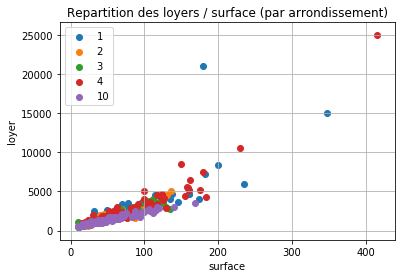

In [6]:
fig = plt.figure()

plt.grid(True)
plt.title("Repartition des loyers / surface (par arrondissement)")

plt.xlabel('surface')
plt.ylabel('loyer')

plt.scatter(tmp.index, tmp[1].values, label='1')
plt.scatter(tmp.index, tmp[2].values, label='2')
plt.scatter(tmp.index, tmp[3].values, label='3')
plt.scatter(tmp.index, tmp[4].values, label='4')
plt.scatter(tmp.index, tmp[10].values, label='10')

plt.legend()
plt.show()

### Nettoyage des données et élimination des valeurs isolées

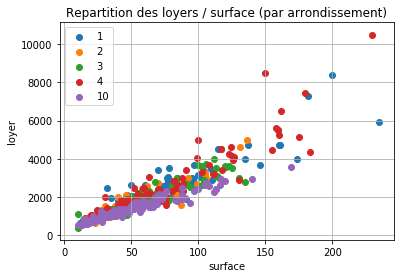

In [7]:
house_data.dropna(inplace=True)

# cast `arrondissement` array en entier 
house_data.arrondissement = house_data.arrondissement.astype(np.int64)

house_data = house_data[house_data['price'] < 12000]

tmp = house_data.pivot_table('price', index='surface',
                     columns='arrondissement')

%matplotlib inline

fig = plt.figure()

plt.grid(True)
plt.title("Repartition des loyers / surface (par arrondissement)")

plt.xlabel('surface')
plt.ylabel('loyer')

plt.scatter(tmp.index, tmp[1].values, label='1')
plt.scatter(tmp.index, tmp[2].values, label='2')
plt.scatter(tmp.index, tmp[3].values, label='3')
plt.scatter(tmp.index, tmp[4].values, label='4')
plt.scatter(tmp.index, tmp[10].values, label='10')

plt.legend()
plt.show()

### Séparation en training / testing set

Nous choisissons de séparer les données avec les proportions suivantes : 80 % pour le training set et 20 % pour le testing set.

In [8]:
x = house_data.drop(columns=['price'])
y = house_data.drop(columns=['surface', 'arrondissement'])

# le parametre random_state permet de controler la repetabilite de l'experience
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.head()

,surface,arrondissement
683,18.0,10
455,114.0,3
343,30.0,3
301,43.0,3
383,55.0,3


### Modèle 0 (baseline) - Régression linéaire avec seulement 1 *feature* (ie, surface) 

In [9]:
# select data 
x = house_data.drop(columns=['price', 'arrondissement'])
y = house_data.drop(columns=['surface', 'arrondissement'])

# le parametre random_state permet de controler la repetabilite de l'experience
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

# fit a model
lm = linear_model.LinearRegression()

model_00 = lm.fit(X_train, y_train)

print("Model 0 (baseline):\n==================")
print("\t coef = {} ".format(model_00.coef_[0]))
print("\t intercept = {} ".format(model_00.intercept_))

y_pred = lm.predict(X_test)

rmse_00 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_00 = metrics.r2_score(y_test, y_pred)

print("=> linear regression (1 features)\n"
      "\tRMS = {:.5f}\n"
      "\tR2 = {:.2f} %\n"
      .format(rmse_00, r2_00))
      

Model 0 (baseline):
	 coef = [30.57669526] 
	 intercept = [185.86414836] 
=> linear regression (1 features)
	RMS = 475.30122
	R2 = 0.83 %



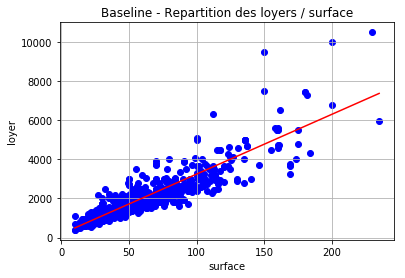

In [10]:
x_min_00 = X_test.surface.min()
x_max_00 = X_test.surface.max()

y_min_00 = model_00.intercept_ + model_00.coef_[0][0] * x_min_00 
y_max_00 = model_00.intercept_ + model_00.coef_[0][0] * x_max_00

fig = plt.figure()

plt.grid(True)
plt.title("Baseline - Repartition des loyers / surface")

plt.xlabel('surface')
plt.ylabel('loyer')

plt.scatter(x, y, color='blue')
plt.plot([x_min_00, x_max_00], [y_min_00, y_max_00], color='red')

plt.show()

### Modèle 1 - Régression linéaire avec 2 *features* (ie, surface, arrondissement) 

In [11]:
# select data 
x = house_data.drop(columns=['price'])
y = house_data.drop(columns=['surface', 'arrondissement'])

# le parametre random_state permet de controler la repetabilite de l'experience
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

# fit a model
lm = linear_model.LinearRegression()

model_01 = lm.fit(X_train, y_train)

print("Model 1:\n=======")
print("\t coef = {} ".format(model_01.coef_[0]))
print("\t intercept = {} ".format(model_01.intercept_))

y_pred = lm.predict(X_test)
      
rmse_01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_01 = metrics.r2_score(y_test, y_pred)

print("=> linear regression (1 features)\n"
      "\tRMS = {:.5f}\n"
      "\tR2 = {:.2f} %\n"
      .format(rmse_01, r2_01 * 100.0))

Model 1:
	 coef = [ 30.23006732 -54.31392129] 
	 intercept = [433.25497853] 
=> linear regression (1 features)
	RMS = 478.53330
	R2 = 82.27 %



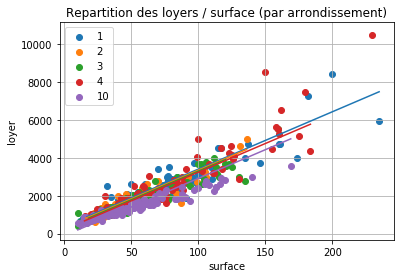

In [12]:
arrdt_list = X_test.arrondissement.unique()
arrdt_list.sort()
arrdt_list = np.array(arrdt_list)

x_min = np.zeros(len(arrdt_list))
x_max = np.zeros(len(arrdt_list))
y_min = np.zeros(len(arrdt_list))
y_max = np.zeros(len(arrdt_list))

for idx, arrdt in enumerate(arrdt_list):
    x_min[idx] = X_test[X_test.arrondissement==arrdt].surface.min()
    x_max[idx] = X_test[X_test.arrondissement==arrdt].surface.max()
    
    y_min[idx] = model_01.intercept_ \
        + model_01.coef_[0][0] * x_min[idx] \
        + model_01.coef_[0][1] * int(arrdt) 
    y_max[idx] = model_01.intercept_ \
        + model_01.coef_[0][0] * x_max[idx] \
        + model_01.coef_[0][1] * int(arrdt) 
    
fig = plt.figure()

plt.grid(True)
plt.title("Repartition des loyers / surface (par arrondissement)")

plt.xlabel('surface')
plt.ylabel('loyer')

plt.scatter(tmp.index, tmp[1].values, label='1')
plt.scatter(tmp.index, tmp[2].values, label='2')
plt.scatter(tmp.index, tmp[3].values, label='3')
plt.scatter(tmp.index, tmp[4].values, label='4')
plt.scatter(tmp.index, tmp[10].values, label='10')

for idx, arrdt in enumerate(arrdt_list):
    plt.plot([x_min[idx], x_max[idx]], [y_min[idx], y_max[idx]])

plt.legend()
plt.show()

### Modèle 2 - Régression polynomiale avec 2 *features* (ie, surface, arrondissement) 

In [13]:
from sklearn.preprocessing import PolynomialFeatures

# select data 
x = house_data.drop(columns=['price', 'arrondissement'])
y = house_data.drop(columns=['surface', 'arrondissement'])

#print(x)
# le parametre random_state permet de controler la repetabilite de l'experience
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)
poly_reg = PolynomialFeatures(degree=2)
x_poly_train = poly_reg.fit_transform(X_train)

lm = linear_model.LinearRegression()
model_02 = lm.fit(x_poly_train, y_train)

print("Model 2:\n=======")
print("\t coef = {} ".format(model_02.coef_[0]))
print("\t intercept = {} ".format(model_02.intercept_))

x_poly_test = poly_reg.fit_transform(X_test)
y_poly_pred = lm.predict(x_poly_test)

rmse_02 = np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred))
r2_02 = metrics.r2_score(y_test, y_poly_pred)

print("=>  regression (1 features)\n"
      "\tRMS = {:.5f}\n"
      "\tR2 = {:.2f} %\n"
      .format(rmse_02, r2_02 * 100.0))

Model 2:
	 coef = [ 0.         17.62143366  0.08005205] 
	 intercept = [552.9434717] 
=>  regression (1 features)
	RMS = 541.54408
	R2 = 77.29 %



(163, 1)


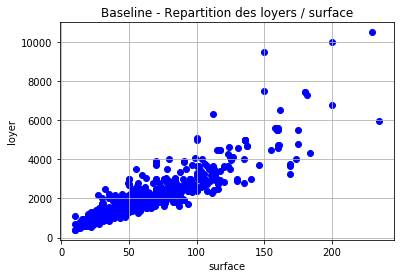

In [19]:
fig = plt.figure()

plt.grid(True)
plt.title("Baseline - Repartition des loyers / surface")

plt.xlabel('surface')
plt.ylabel('loyer')

plt.scatter(x, y, color='blue')

print(y_poly_pred.shape)
